In [13]:
%matplotlib inline
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
import seaborn as sns
import warnings
import locale

pd.options.display.float_format = '{:,}'.format

bd1_data_path = "Resources/Realtor_1BD.csv"
bd2_data_path = "Resources/Realtor_2BD.csv"
bd3_data_path = "Resources/Realtor_3BD.csv"
bd4_data_path = "Resources/Realtor_4BD.csv"
bd5_data_path = "Resources/Realtor_5BD.csv"

austin_bnb_path = "Resources/aus_listings.csv"
boston_bnb_path = "Resources/bos_listings.csv"
chicago_bnb_path = "Resources/chi_listings.csv"
sandiego_bnb_path = "Resources/sd_listings.csv"
seattle_bnb_path = "Resources/sea_listings.csv"

bd1_df = pd.read_csv(bd1_data_path)
bd2_df = pd.read_csv(bd2_data_path)
bd3_df = pd.read_csv(bd3_data_path)
bd4_df = pd.read_csv(bd4_data_path)
bd5_df = pd.read_csv(bd5_data_path)

aus_bnb_df = pd.read_csv(austin_bnb_path)
bos_bnb_df = pd.read_csv(boston_bnb_path)
chi_bnb_df = pd.read_csv(chicago_bnb_path)
sd_bnb_df = pd.read_csv(sandiego_bnb_path)
sea_bnb_df = pd.read_csv(seattle_bnb_path)

C:\Users\chino\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\chino\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
colors = {'bd1_df':'lightcoral', 'bd_2':'lightskyblue', 'bd_3':'gold'}

bd1_df = bd1_df[bd1_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd1_df = bd1_df[bd1_df["CBSATitle"].str.contains("MN") == False]
bd1_df = bd1_df[bd1_df["PropertyType"] == "Total"]
bd1_df = bd1_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd1_df = bd1_df.sort_values(by = ["CBSATitle"])
locale.setlocale(locale.LC_ALL,'')

bd2_df = bd2_df[bd2_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd2_df = bd2_df[bd2_df["CBSATitle"].str.contains("MN") == False]
bd2_df = bd2_df[bd2_df["PropertyType"] == "Total"]
bd2_df = bd2_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd2_df = bd2_df.sort_values(by = ["CBSATitle"])

bd3_df = bd3_df[bd3_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd3_df = bd3_df[bd3_df["CBSATitle"].str.contains("MN") == False]
bd3_df = bd3_df[bd3_df["PropertyType"] == "Total"]
bd3_df = bd3_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd3_df = bd3_df.sort_values(by = ["CBSATitle"])

bd4_df = bd4_df[bd4_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd4_df = bd4_df[bd4_df["CBSATitle"].str.contains("MN") == False]
bd4_df = bd4_df[bd4_df["PropertyType"] == "Total"]
bd4_df = bd4_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd4_df = bd4_df.sort_values(by = ["CBSATitle"])

bd5_df = bd5_df[bd5_df["CBSATitle"].str.contains("Boston|Austin|San Diego|Chicago|Seattle") == True]
bd5_df = bd5_df[bd5_df["CBSATitle"].str.contains("MN") == False]
bd5_df = bd5_df[bd5_df["PropertyType"] == "Total"]
bd5_df = bd5_df[["CBSATitle","PropertyType","MedianListingPrice "]]
bd5_df = bd5_df.sort_values(by = ["CBSATitle"])

In [15]:
aus_bnb_df = aus_bnb_df[["latitude","longitude","room_type","bedrooms","price","minimum_nights",
                         "availability_365","number_of_reviews","reviews_per_month"]]
aus_bnb_df = aus_bnb_df.dropna()
aus_bnb_df = aus_bnb_df[aus_bnb_df["room_type"] == "Entire home/apt"]
aus_bnb_df["price"] = aus_bnb_df["price"].str.replace(",","")
aus_bnb_df["price"] = aus_bnb_df["price"].str.replace("$","")
aus_bnb_df["price"] = aus_bnb_df["price"].astype(float)

bos_bnb_df = bos_bnb_df[["latitude","longitude","room_type","bedrooms","price","minimum_nights",
                         "availability_365","number_of_reviews","reviews_per_month"]]
bos_bnb_df = bos_bnb_df.dropna()
bos_bnb_df = bos_bnb_df[bos_bnb_df["room_type"] == "Entire home/apt"]
bos_bnb_df["price"] = bos_bnb_df["price"].str.replace(",","")
bos_bnb_df["price"] = bos_bnb_df["price"].str.replace("$","")
bos_bnb_df["price"] = bos_bnb_df["price"].astype(float)

chi_bnb_df = chi_bnb_df[["latitude","longitude","room_type","bedrooms","price","minimum_nights",
                         "availability_365","number_of_reviews","reviews_per_month"]]
chi_bnb_df = chi_bnb_df.dropna()
chi_bnb_df = chi_bnb_df[chi_bnb_df["room_type"] == "Entire home/apt"]
chi_bnb_df["price"] = chi_bnb_df["price"].str.replace(",","")
chi_bnb_df["price"] = chi_bnb_df["price"].str.replace("$","")
chi_bnb_df["price"] = chi_bnb_df["price"].astype(float)

sd_bnb_df = sd_bnb_df[["latitude","longitude","room_type","bedrooms","price","minimum_nights",
                         "availability_365","number_of_reviews","reviews_per_month"]]
sd_bnb_df = sd_bnb_df.dropna()
sd_bnb_df = sd_bnb_df[sd_bnb_df["room_type"] == "Entire home/apt"]
sd_bnb_df["price"] = sd_bnb_df["price"].str.replace(",","")
sd_bnb_df["price"] = sd_bnb_df["price"].str.replace("$","")
sd_bnb_df["price"] = sd_bnb_df["price"].astype(float)

sea_bnb_df = sea_bnb_df[["latitude","longitude","room_type","bedrooms","price","minimum_nights",
                         "availability_365","number_of_reviews","reviews_per_month"]]
sea_bnb_df = sea_bnb_df.dropna()
sea_bnb_df = sea_bnb_df[sea_bnb_df["room_type"] == "Entire home/apt"]
sea_bnb_df["price"] = sea_bnb_df["price"].str.replace(",","")
sea_bnb_df["price"] = sea_bnb_df["price"].str.replace("$","")
sea_bnb_df["price"] = sea_bnb_df["price"].astype(float)

In [16]:
# assume that we use "reviews per month" as our possible guest
# 1 bed room

aus_bnb_bd1 = aus_bnb_df[aus_bnb_df["bedrooms"] == 1]
bos_bnb_bd1 = bos_bnb_df[bos_bnb_df["bedrooms"] == 1]
chi_bnb_bd1 = chi_bnb_df[chi_bnb_df["bedrooms"] == 1]
sd_bnb_bd1 = sd_bnb_df[sd_bnb_df["bedrooms"] == 1]
sea_bnb_bd1 = sea_bnb_df[sea_bnb_df["bedrooms"] == 1]

aus_bd1_income = (aus_bnb_bd1["price"]*aus_bnb_bd1["minimum_nights"]*aus_bnb_bd1["reviews_per_month"]).mean()
bos_bd1_income = (bos_bnb_bd1["price"]*bos_bnb_bd1["minimum_nights"]*bos_bnb_bd1["reviews_per_month"]).mean()
chi_bd1_income = (chi_bnb_bd1["price"]*chi_bnb_bd1["minimum_nights"]*chi_bnb_bd1["reviews_per_month"]).mean()
sd_bd1_income = (sd_bnb_bd1["price"]*sd_bnb_bd1["minimum_nights"]*sd_bnb_bd1["reviews_per_month"]).mean()
sea_bd1_income = (sea_bnb_bd1["price"]*sea_bnb_bd1["minimum_nights"]*sea_bnb_bd1["reviews_per_month"]).mean()

city_bd1_income = [aus_bd1_income,bos_bd1_income,chi_bd1_income,sd_bd1_income,sea_bd1_income]
city_bd1_income

[727.461753121998,
 851.9861849710982,
 609.1923928860141,
 762.7223193422769,
 716.3116189000791]

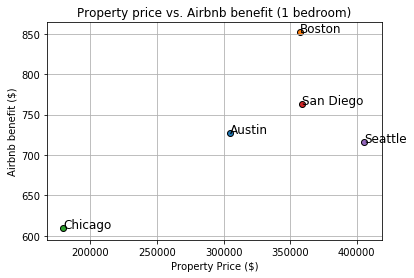

In [18]:
city_name = ["Austin","Boston","Chicago","San Diego","Seattle"]

x_axis = bd1_df["MedianListingPrice "].values
y_axis = city_bd1_income

for i,city in enumerate(city_name):
    
    x = x_axis[i]
    y = y_axis[i]
    pd.options.display.float_format = '{:,}'.format
    plt.scatter(x, y, marker="o", edgecolors="black",alpha=1)
    plt.text(x, y, city, fontsize = 12)
       
plt.grid(True)
plt.title("Property price vs. Airbnb benefit (1 bedroom)")
plt.xlabel("Property Price ($)")
plt.ylabel("Airbnb benefit ($)")
plt.savefig("1_bedroom.png")
plt.savefig("Images/1_bedroom_plot.png")
plt.show()

In [19]:
# assume that we use "reviews per month" as our possible guest
# 2 bed room

aus_bnb_bd2 = aus_bnb_df[aus_bnb_df["bedrooms"] == 2]
bos_bnb_bd2 = bos_bnb_df[bos_bnb_df["bedrooms"] == 2]
chi_bnb_bd2 = chi_bnb_df[chi_bnb_df["bedrooms"] == 2]
sd_bnb_bd2 = sd_bnb_df[sd_bnb_df["bedrooms"] == 2]
sea_bnb_bd2 = sea_bnb_df[sea_bnb_df["bedrooms"] == 2]

aus_bd2_income = (aus_bnb_bd2["price"]*aus_bnb_bd2["minimum_nights"]*aus_bnb_bd2["reviews_per_month"]).mean()
bos_bd2_income = (bos_bnb_bd2["price"]*bos_bnb_bd2["minimum_nights"]*bos_bnb_bd2["reviews_per_month"]).mean()
chi_bd2_income = (chi_bnb_bd2["price"]*chi_bnb_bd2["minimum_nights"]*chi_bnb_bd2["reviews_per_month"]).mean()
sd_bd2_income = (sd_bnb_bd2["price"]*sd_bnb_bd2["minimum_nights"]*sd_bnb_bd2["reviews_per_month"]).mean()
sea_bd2_income = (sea_bnb_bd2["price"]*sea_bnb_bd2["minimum_nights"]*sea_bnb_bd2["reviews_per_month"]).mean()

city_bd2_income = [aus_bd2_income,bos_bd2_income,chi_bd2_income,sd_bd2_income,sea_bd2_income]
city_bd2_income

[636.7810227848098,
 1113.772102615694,
 1303.244365548982,
 876.3148377433848,
 1053.648735795454]

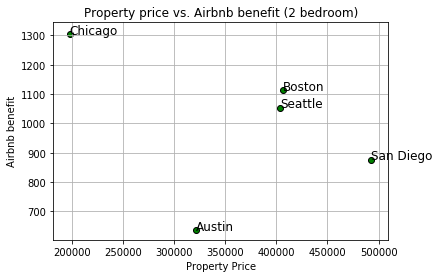

In [20]:
city_name = ["Austin","Boston","Chicago","San Diego","Seattle"]

x_axis = bd2_df["MedianListingPrice "].values
y_axis = city_bd2_income

for i,city in enumerate(city_name):
    
    x = x_axis[i]
    y = y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="green", edgecolors="black",alpha=1)
    plt.text(x, y, city, fontsize = 12)
       
plt.grid(True)
plt.title("Property price vs. Airbnb benefit (2 bedroom)")
plt.xlabel("Property Price")
plt.ylabel("Airbnb benefit")
plt.savefig("Images/2_bedroom_plot.png")
plt.show()

In [21]:
# assume that we use "reviews per month" as our possible guest
# 3 bed room

aus_bnb_bd3 = aus_bnb_df[aus_bnb_df["bedrooms"] == 3]
bos_bnb_bd3 = bos_bnb_df[bos_bnb_df["bedrooms"] == 3]
chi_bnb_bd3 = chi_bnb_df[chi_bnb_df["bedrooms"] == 3]
sd_bnb_bd3 = sd_bnb_df[sd_bnb_df["bedrooms"] == 3]
sea_bnb_bd3 = sea_bnb_df[sea_bnb_df["bedrooms"] == 3]

aus_bd3_income = (aus_bnb_bd3["price"]*aus_bnb_bd3["minimum_nights"]*aus_bnb_bd3["reviews_per_month"]).mean()
bos_bd3_income = (bos_bnb_bd3["price"]*bos_bnb_bd3["minimum_nights"]*bos_bnb_bd3["reviews_per_month"]).mean()
chi_bd3_income = (chi_bnb_bd3["price"]*chi_bnb_bd3["minimum_nights"]*chi_bnb_bd3["reviews_per_month"]).mean()
sd_bd3_income = (sd_bnb_bd3["price"]*sd_bnb_bd3["minimum_nights"]*sd_bnb_bd3["reviews_per_month"]).mean()
sea_bd3_income = (sea_bnb_bd3["price"]*sea_bnb_bd3["minimum_nights"]*sea_bnb_bd3["reviews_per_month"]).mean()

city_bd3_income = [aus_bd3_income,bos_bd3_income,chi_bd3_income,sd_bd3_income,sea_bd3_income]
city_bd3_income

[942.8065927750412,
 1369.5948333333333,
 1037.53912568306,
 1075.0006362007166,
 912.2951132686085]

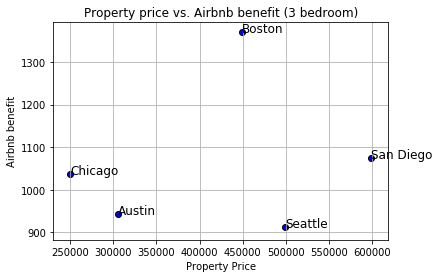

In [22]:
city_name = ["Austin","Boston","Chicago","San Diego","Seattle"]

x_axis = bd3_df["MedianListingPrice "].values
y_axis = city_bd3_income

for i,city in enumerate(city_name):
    
    x = x_axis[i]
    y = y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black",alpha=1)
    plt.text(x, y, city, fontsize = 12)
       
plt.grid(True)
plt.title("Property price vs. Airbnb benefit (3 bedroom)")
plt.xlabel("Property Price")
plt.ylabel("Airbnb benefit")
plt.savefig("Images/3_bedroom_plot.png")
plt.show()

In [23]:
# assume that we use "reviews per month" as our possible guest
# 4 bed room

aus_bnb_bd4 = aus_bnb_df[aus_bnb_df["bedrooms"] == 4]
bos_bnb_bd4 = bos_bnb_df[bos_bnb_df["bedrooms"] == 4]
chi_bnb_bd4 = chi_bnb_df[chi_bnb_df["bedrooms"] == 4]
sd_bnb_bd4 = sd_bnb_df[sd_bnb_df["bedrooms"] == 4]
sea_bnb_bd4 = sea_bnb_df[sea_bnb_df["bedrooms"] == 4]

aus_bd4_income = (aus_bnb_bd4["price"]*aus_bnb_bd4["minimum_nights"]*aus_bnb_bd4["reviews_per_month"]).mean()
bos_bd4_income = (bos_bnb_bd4["price"]*bos_bnb_bd4["minimum_nights"]*bos_bnb_bd4["reviews_per_month"]).mean()
chi_bd4_income = (chi_bnb_bd4["price"]*chi_bnb_bd4["minimum_nights"]*chi_bnb_bd4["reviews_per_month"]).mean()
sd_bd4_income = (sd_bnb_bd4["price"]*sd_bnb_bd4["minimum_nights"]*sd_bnb_bd4["reviews_per_month"]).mean()
sea_bd4_income = (sea_bnb_bd4["price"]*sea_bnb_bd4["minimum_nights"]*sea_bnb_bd4["reviews_per_month"]).mean()

city_bd4_income = [aus_bd4_income,bos_bd4_income,chi_bd4_income,sd_bd4_income,sea_bd4_income]
city_bd4_income

[1256.9587358490562,
 2112.6227272727274,
 1189.8991037735848,
 1567.6953828306252,
 1190.0970776255706]

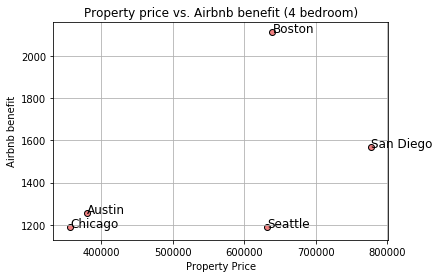

In [24]:
city_name = ["Austin","Boston","Chicago","San Diego","Seattle"]

x_axis = bd4_df["MedianListingPrice "].values
y_axis = city_bd4_income

for i,city in enumerate(city_name):
    
    x = x_axis[i]
    y = y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="lightcoral", edgecolors="black",alpha=1)
    plt.text(x, y, city, fontsize = 12)
       
plt.grid(True)
plt.title("Property price vs. Airbnb benefit (4 bedroom)")
plt.xlabel("Property Price")
plt.ylabel("Airbnb benefit")
plt.savefig("Images/4_bedroom_plot.png")
plt.show()

In [25]:
# assume that we use "reviews per month" as our possible guest
# 5 bed room

aus_bnb_bd5 = aus_bnb_df[aus_bnb_df["bedrooms"] == 5]
bos_bnb_bd5 = bos_bnb_df[bos_bnb_df["bedrooms"] == 5]
chi_bnb_bd5 = chi_bnb_df[chi_bnb_df["bedrooms"] == 5]
sd_bnb_bd5 = sd_bnb_df[sd_bnb_df["bedrooms"] == 5]
sea_bnb_bd5 = sea_bnb_df[sea_bnb_df["bedrooms"] == 5]

aus_bd5_income = (aus_bnb_bd5["price"]*aus_bnb_bd5["minimum_nights"]*aus_bnb_bd5["reviews_per_month"]).mean()
bos_bd5_income = (bos_bnb_bd5["price"]*bos_bnb_bd5["minimum_nights"]*bos_bnb_bd5["reviews_per_month"]).mean()
chi_bd5_income = (chi_bnb_bd5["price"]*chi_bnb_bd5["minimum_nights"]*chi_bnb_bd5["reviews_per_month"]).mean()
sd_bd5_income = (sd_bnb_bd5["price"]*sd_bnb_bd5["minimum_nights"]*sd_bnb_bd5["reviews_per_month"]).mean()
sea_bd5_income = (sea_bnb_bd5["price"]*sea_bnb_bd5["minimum_nights"]*sea_bnb_bd5["reviews_per_month"]).mean()

city_bd5_income = [aus_bd5_income,bos_bd5_income,chi_bd5_income,sd_bd5_income,sea_bd5_income]
city_bd5_income

[2121.98743902439,
 3262.7927586206893,
 1363.3905454545454,
 1266.4228985507248,
 1413.4917741935483]

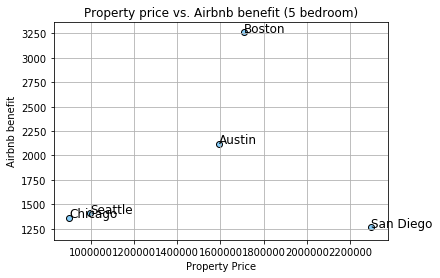

In [26]:
city_name = ["Austin","Boston","Chicago","San Diego","Seattle"]

x_axis = bd5_df["MedianListingPrice "].values
y_axis = city_bd5_income

for i,city in enumerate(city_name):
    
    x = x_axis[i]
    y = y_axis[i]
    plt.scatter(x, y, marker="o", facecolors="lightskyblue", edgecolors="black",alpha=1)
    plt.text(x, y, city, fontsize = 12)
       
plt.grid(True)
plt.title("Property price vs. Airbnb benefit (5 bedroom)")
plt.xlabel("Property Price")
plt.ylabel("Airbnb benefit")
plt.savefig("Images/5_bedroom_bar.png")
plt.show()